# Housing Prices Prediction
## Main Goals
- Preprocess the dataset
    - Handle missing values
    - Normalize numerical features
    - Encode categorical and ordinal features
    - Create interaction terms
- Predict house prices based on various features
    - Build, train, and test a regression model

### Context
Accurately predicting house prices is a classic challenge in data science and machine learning. In the real world, housing prices depend on a combination of factors, such as the location of the house, its condition, size, age, and neighborhood, among many others. Successfully modeling these relationships can help both buyers and sellers make informed decisions, and is a valuable tool for industries ranging from real estate to finance.

This project uses a house prices dataset from Kaggle to demonstrate key feature engineering techniques, including normalization, handling categorical and ordinal variables, and creating new features from existing data. The goal is to build an end-to-end predictive modeling workflow that takes raw data and produces accurate price estimates, while explaining each major step along the way.

## 1. Data Loading

We'll be using the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) dataset. In accordance with Kaggle licenses, please directly visit the Kaggle website and download the `train.csv` dataset before running this notebook. You will have to agree to the rules of the competition associated with the dataset in order to download the file. Though we are downloading this dataset, we won't be using it for competition purposes.

As always, the first step in any data science project is to load the data and take a look at what we’re working with. This helps ensure the file was loaded correctly, and lets us get a sense of the features available.
Our immediate goal is to read the downloaded train.csv into a pandas DataFrame and display the first few rows. To do this, we’ll start by importing the pandas library, and then loading the data.

In [19]:
#Import necessary libraries
#There are many helpful libraries in Python for data science, but we’ll start with pandas.
#As we go through the project, we’ll import other libraries as we need them.
import pandas as pd

In [20]:
#Read the dataset to a pandas DataFrame
df = pd.read_csv("train.csv")

#Inspect the dataframe. Using display() will let us see the first 5 and the last 5 rows.
display(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### 1a. Understanding the Data
Here, we’ll explore the columns, examine some summary statistics, and make note of which features are numerical, categorical, or ordinal. We’ll also look for any columns that may need special attention, such as those with missing values or unusual entries.

Displaying the data as we did before typically lets us get a good idea of what we have to work with, and what features may be relevant. With larger datasets with many features however, using display() or .head() will omit some columns, it helps to either view the spreadsheet directly, or to print out the columns so as to see the features.

In [21]:
#Display all column names
print(df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

A little messy, but lets make note of some of the important features in the data.

- SalePrice – This is our target column. It gives the final sale price of the home in dollars. Everything else we do is focused on helping the model predict this value as accurately as possible.
- GrLivArea – The above-ground living area in square feet. Generally, more space means a higher price.
- OverallQual – An overall rating for the material and finish quality of the house. Though numeric, this is more of an ordinal feature (higher is better).
- YearBuilt – The original construction date of the home. Newer homes often sell for more.
- GarageArea – Size of the garage in square feet. Larger garages can tend to raise the cost of a home.
- Neighborhood – The physical location within the city. Some neighborhoods are naturally more expensive than others.
- ExterQual, KitchenQual, BsmtQual – Various quality ratings for different parts of the home. Like OverallQual, these are ordinal features and often strongly influence sale price.
- MiscFeature – Any miscellaneous feature not captured by other columns (like a tennis court or shed). Often sparse.
- MoSold, YrSold – The month and year the home was sold. While it might be tempting to include this, it can sometimes lead to data leakage if not handled carefully. This means that while this information is available to us in this dataset, it isn't realistic to have this infromation in real life, and can cause the model to make predictions it otherwise wouldn't make.

You’ll also notice that some features might be rare, sparsely filled, or even redundant for our modeling goals. We’ll handle this during preprocessing, as we drop what's unnecessary, and transform what’s useful.

It's also always helpful to refer back to the source of the dataset, as the features and columns are explained on Kaggle. If anything seems confusing or doesn't make sense, some clarification can arise from refering back to the source of the data. Doing so reveals many of the features have odd enteries, such as using numbers as codes like MSSubClass.  

#### 1b. Catergorizing the Data
Viewing the data, we can see that it's split up into numerical, categorical, and ordinal data. Numerical meaning that the entries are represented by numbers. Categorical meaning they are represented by an object, typically strings. 

Ordinal data is a bit tricky, as it is a kind of data that has a clear, ranked order, but the spacing between categories isn't necessarily equal. The entries could be strings, or numbers, so there tends to be overlap with the other two categories. The main idea is that the data is ordered in a meaningful way.

Something important to note is the way the MSSubClass feature acts. MSSubClass uses numbers as codes for buildings, so while the codes should mean it is categorical, as it is right now, python will treat it as numerical, which will cause more problems down the line. Additionally, our model could misinterpret the numbers as ordinal as well, even though one code isn't "worth" more than another. This will be dealt with when we preprocess the data. For now, we still want to understand it better.

Let's try to identify the categories of each kind of data. While pandas provides helpful tools to discern which features are numerical and categorical, you will have to view the data itself in order to determine which features are ordinal. This takes work, but the key is seeing if there is a meaningful ranking in the data.

In [22]:
#Identify numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Features:", num_features)

#Identify categorical features
cat_features = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical Features:", cat_features)

#Manually defining the ordinal data. Unfortunately, pandas can't give us a shortcut for this.
#The list was made vertically
ord_features = [
    'OverallQual',
    'OverallCond',
    'ExterQual',
    'ExterCond',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'HeatingQC',
    'KitchenQual',
    'Functional',
    'FireplaceQu',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'PoolQC',
    'Fence',
    'LotShape',
    'LandContour',
    'LandSlope'
]

print("\nOrdinal Features", ord_features)


Numerical Features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firepl

With this, we know have a better idea of how to deal with certain features down the line. Good work! Another thing worth noting is that we have a lot of features in relation to how many total entries we have. Overall, having this many features can make it difficult for a predictive model to sucecesfully predict what is. What the model might do instead is just associate a certain price with corresponding values from features, trying to "remember" what would happen instead of trying to predict. While we first have to clean the data, which might lead to creating even more features for now, we'll later on filter out the features that have the best correlation with the target, SalePrice.

## 2. Preprocessing

Now that we have our data, lets take some actions to clean it. We can start by viewing which columns are missing are missing data. Reading the description of the dataset on Kaggle, we can actually see that for many features, null values are placed intentionally to represent that a house is missing a certain feature. For example, NA on BsmtQual (basement quality) means that there simply is no basement, as opposed to there being no data for that house. Many well documented datasets will do this, so it's important to read the descriptions, and truly understand what data you are working with.

Keeping that in mind, we can start preprocessing as we would normally. Columns with too much missing data will be dropped, while important columns with some missing data will have the missing values imputed, or filled in with relvant measures of central tendency. In other words, we will fill in those missing values with the mean, median, or mode of the column, depending on the type of data it holds We can also impute with "none", so as to say that the feature simply doesn't exist with a certain house type.

Typically we would use code such as df.isnull().sum() to see this, but python omits some features due to there being too many. As such we will take a different approach and take advantage of pandas flexibility and filter for what we are looking for. This way, we only see features with null values.

In [23]:
#Start by viewing columns with missing values.
#df.isnull().sum() # we would use this, but due to the large amount of columns, many features are omitted.

#This shows only the columns with missing values, sorted from most to least
#missing is a pandas Series. Built like a singular dataframe column, we have it store the list of features with missing values
missing = df.isnull().sum()

#Here, we filter the series, saying we only want values greater than 0. For our case, features with missing data
#.sort_values Just sorts it for us so that the features missing the most data is at the top.
missing = missing[missing > 0].sort_values(ascending=False)
display(missing)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Now that we've loaded the data, it’s important to take a moment and inspect which columns contain missing values. Large datasets often include features that are partially recorded, and how we deal with these gaps can significantly affect our model's performance.

Certain features, like PoolQC, MiscFeature, Alley, and Fence, are missing in over 1,000 rows, meaning the majority of homes didn’t have those features recorded. In situations like this, the safest and simplest solution is to drop these columns entirely. While they may provide some information, their sparsity means they’re likely to introduce more noise than value, and negatively impact the performance of our model. Even if the null values were intentional, having over 1,000 entries as null makes them statistically weak and hard to model reliably.


Features like FireplaceQu and LotFrontage also have a large number of missing values. However, unlike the features above, not only do these describe more commonly present aspects of a home, but a far fewer percent of these values are missing. In these cases, it may be better to impute the missing entries. For example:
- Numerical features such as LotFrontage could be filled by using the median value grouped by neighborhood. Though depending on the context of other features, mean and mode could work better.
- Categorical features such as FireplaceQu could be filled with "None" or the mode, depending on context.

While it is tempting to drop MasVnrType due to it missing over half of its values, this feature is directly connected to the MasVnrArea feature, and therefore we can still garner information from it. We can impute the null values to be "None".

The remaining features are only missing a small percentage of data, so it makes sense to impute the data here as well.

### 2a. Dropping Columns and Imputing Values
Now that we know where to start, lets start our preprocessing and drop the PoolQC, MiscFeature, Alley, and Fence features, while imputing null entries for the remaining features. Knowing what to impute depends on what kind of data it is. 

We also know to drop MoSold and YrSold, as it may cause a data leak and negatively impact our model.

In [24]:
#Dropping sparse or low-impact columns with extreme missingness
#These features are technically meaningful, but too sparse to be useful
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MoSold', 'YrSold'], axis=1)

#MasVnrType: categorical --> missing means no veneer → fill with 'None'
df['MasVnrType'] = df['MasVnrType'].fillna('None')

#FireplaceQu: categorical --> missing means no fireplace → fill with 'None'
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

#LotFrontage: numeric --> we'll fill using the median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

#Garage features: All categorical --> missing --> no garage
#Since there are many features for garages, we are joining them together in a list, and iterating through them to impute "None"
garage_cat_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cat_cols:
    df[col] = df[col].fillna('None')

#GarageYrBlt: numeric --> 0 for no garage
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

#Basement features: All categorical --> missing --> no basement
#Since there are many features for basements, we are joining them together in a list, and iterating through them to impute "None"
bsmt_cat_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in bsmt_cat_cols:
    df[col] = df[col].fillna('None')

#MasVnrArea: missing --> 0 means no veneer
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

#Electrical: only one missing --> use mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

#Inspect our data to view the changes. There is so much to view, so we just double check to ensure the null values have been dealt with.
#We can do this by reusing the code from the previous segment.
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing)



Series([], dtype: int64)

Since the resulting Series created from features with null entires is empty, it means that we have sucessfully dealt with all the null entries! Before moving on to the next step of preprocessing, there is one glaring issue that still needs to be addressed: MSSubClass, a numerical feature that should be categorical. 

### 2b. Dealing with Unusual Entries
In this housing dataset, MSSubClass is the only feature that behaves unusually in the sense that even though it is numerical, it acts categorical. Before proceeding, this should be dealt with so that our model will treat the feature as categorical. Thankfully, this is a quick fix, as we can simply cast the feature as a string, and it'll be treated as categorical from now on.

In [25]:
#Convert MSSubClass from int to string to mark it as categorical
df['MSSubClass'] = df['MSSubClass'].astype(str)


### 2c. Encoding Categorical Features
Now that our dataset has been cleaned up a little, we can shift our attention to handling our categorical data. Our dataset contains a number of columns that hold string values, representing things like neighborhood names, zoning codes, foundation types, and more.

These kinds of features can be very useful, but models generally require them to be converted into numbers in order to work with them. One common way to do this is by using a technique called one-hot encoding, where we create new columns for each category, with a value of 1 or 0 depending on whether the observation belongs to that category. This will ultimately create more features, which will be an issue, but we will filter for the features that correlate with SalePrice the most. Encoding these features now allows us to make sure that these features are considered when we filter later.

We also need to be careful with our ordinal features. These are features that represent categories with a clear ranking, such as condition or quality. Unlike normal categorical features, these should not be one-hot encoded. Instead, we’ll map their string values to ordered numbers so that the model understands their ranked structure. In other words, we will assign numbers to these rankings depending on their "worth", so for entries that are bad, we can put a 1, while good entries may be a 4 or 5. 

Let’s now encode both the ordinal features and the remaining categorical ones.

In [26]:
#We begin by applying ordinal encoding to features that have a meaningful rank or order.
#To do this, we define a mapping dictionary that assigns numeric values to string categories based on the dataset documentation
#This dictionary covers each scale for the ordinal-categorical features.
ordinal_maps = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0,    # Quality/Condition scales
    'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,    # Basement finish types
    'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0,   # Functionality ranking
    'Y': 2, 'P': 1, 'N': 0,     # PavedDrive (yes > partial > none)
    'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0,     # BsmtExposure ranking
    'Fin': 3, 'RFn': 2, 'Unf': 1  # GarageFinish ranking

}

#These are the columns that will use ordinal encoding based on the above ranking
ordinal_cols = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional',
    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PavedDrive'
]

#We now apply the ordinal encoding using the .map() function
#This replaces each string value with its corresponding numeric rank 
#This is done by searching the values in each feature, and replacing it with the associated value in the ordinal map.
for col in ordinal_cols:
    df[col] = df[col].map(ordinal_maps)

#Next, we apply One-hot-encoding to the remaining categorical features
#We first identify all remaining object-type columns (strings) that were not part of the ordinal encoding
remaining_cats = df.select_dtypes(include='object').columns.tolist()

#We use pd.get_dummies() to create new binary columns for each unique category
#This allows the model to understand category membership without assuming any order
df = pd.get_dummies(df, columns=remaining_cats)

#Check the shape and first few columns of the final dataset. We can see some of the data encoded.
print(df.shape)
df.head()



(1460, 235)


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,3,3,...,False,False,False,True,False,False,False,False,True,False
1,2,80.0,9600,6,8,1976,1976,0.0,3,3,...,False,False,False,True,False,False,False,False,True,False
2,3,68.0,11250,7,5,2001,2002,162.0,3,3,...,False,False,False,True,False,False,False,False,True,False
3,4,60.0,9550,7,5,1915,1970,0.0,3,3,...,False,False,False,True,True,False,False,False,False,False
4,5,84.0,14260,8,5,2000,2000,350.0,3,3,...,False,False,False,True,False,False,False,False,True,False


## 3. Visualizing the Data
After preprocessing the data (and in many projects, before), it's important to visualize the data with some graphs to understand what features you are working with, and if you can spot any patterns or correlations early on.

Lets create a few graphs for important features that might have correlations with the sale price.

For these visualizations, we will be using the seaborn and matplotlib libraries. They work well together, and are commonplace for python graphs.

Note: you may need to restart the kernel to use updated packages.


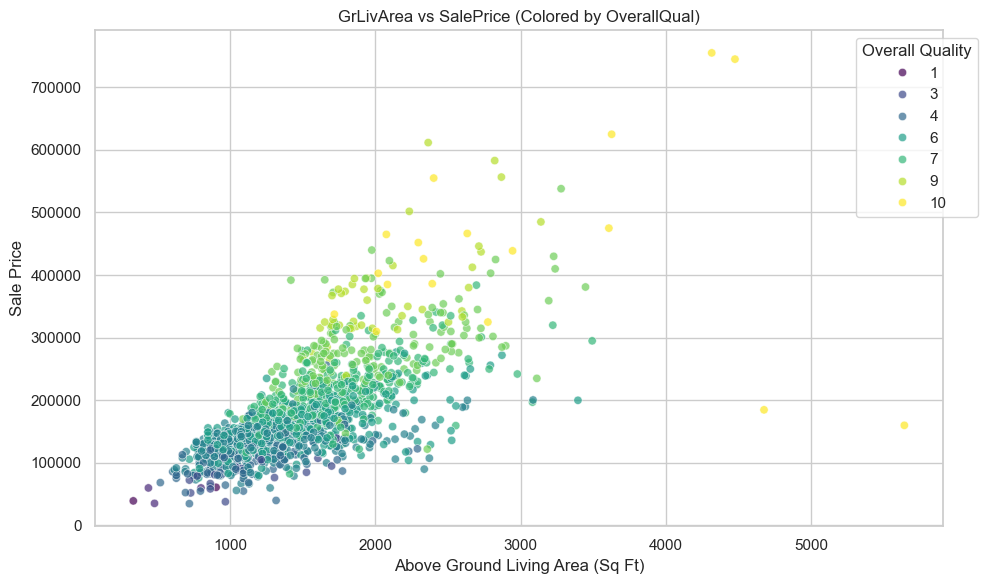

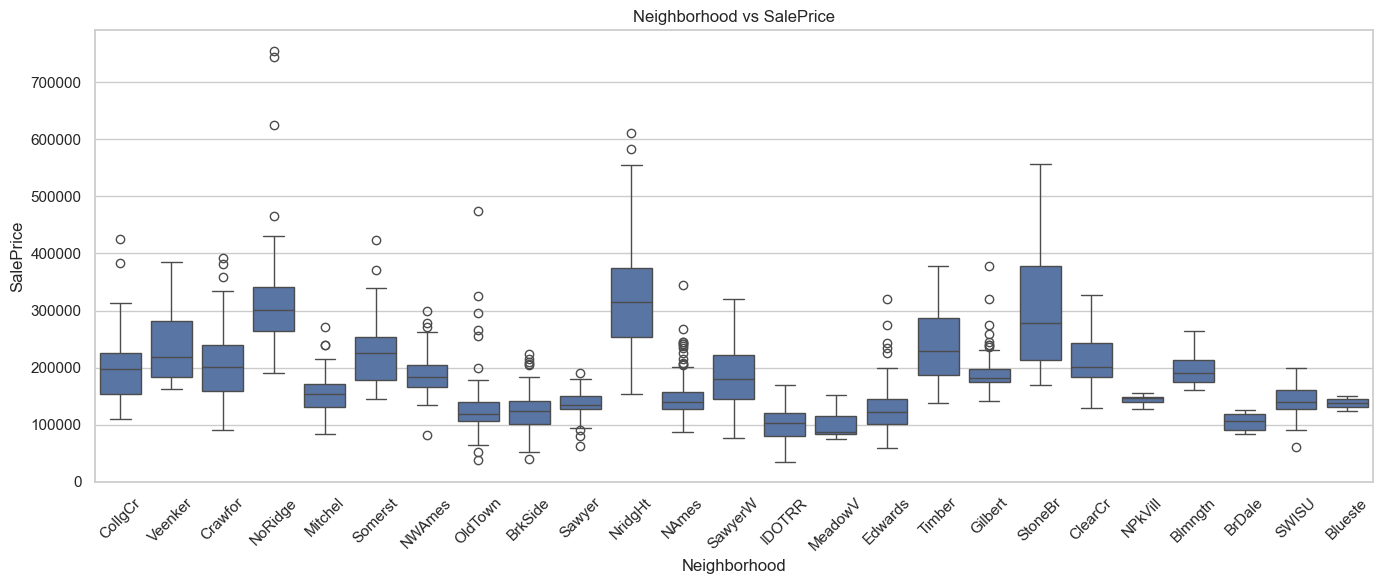

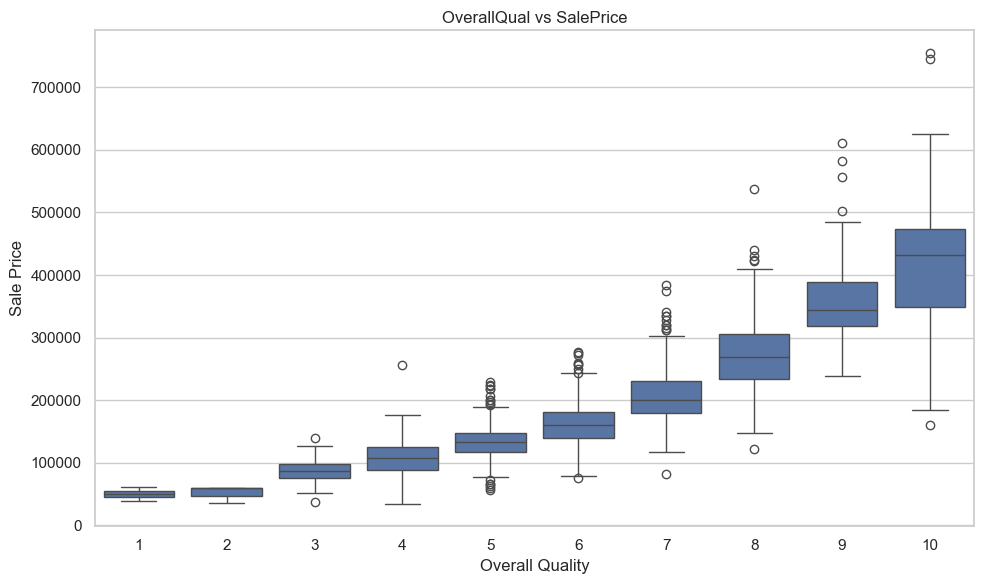

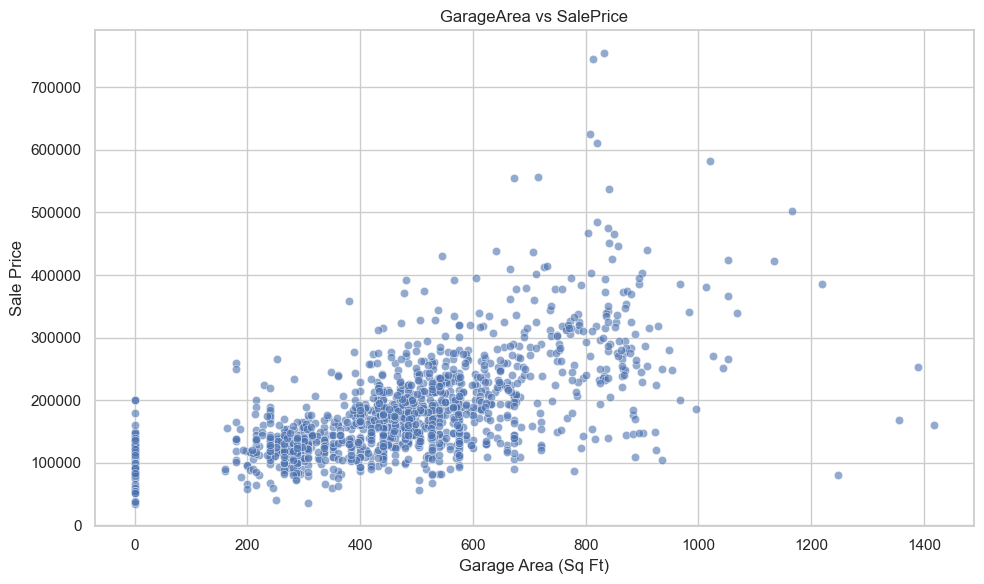

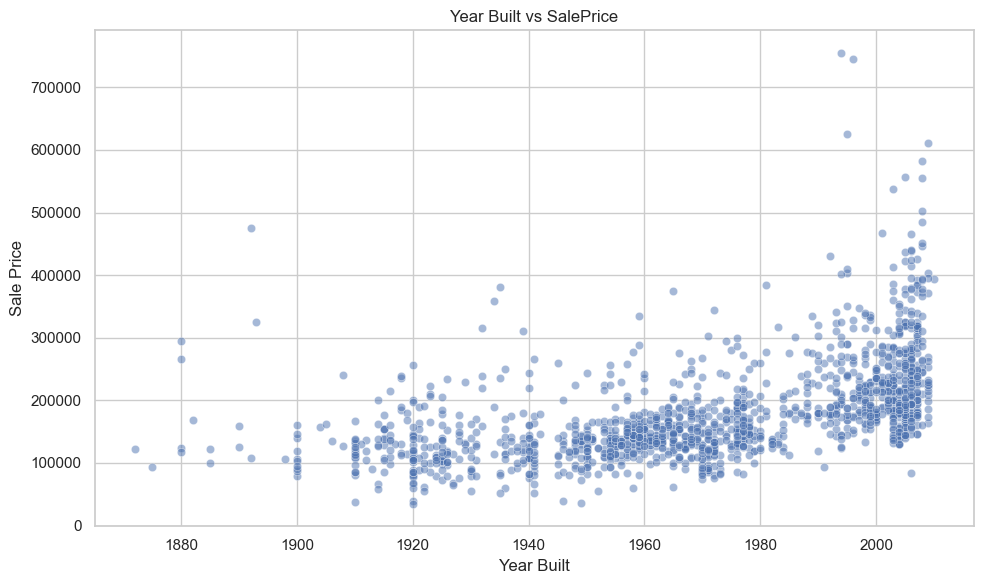

In [28]:
#Import necessary libraries
#Currently having an issue where seaborn refuses to install permanently. 
#%pip install seaborn fixes this. Use if necessary.
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

#Before we create our plots, it's important to know we may have to change the x axis due to the normalization. 
#By using strong features that were never missing values, we can still make helpful visualizations
#A better practice would be to make these visualizations before preprocessing step.
#but for now, we can create a dataframe of the orignal data for these 

temp_df = pd.read_csv("train.csv")
#Plot 1: GrLivArea vs SalePrice with color by OverallQual
plt.figure(figsize=(10, 6))
sns.scatterplot(data=temp_df, x='GrLivArea', y='SalePrice', hue='OverallQual', palette='viridis', alpha=0.7)
plt.title("GrLivArea vs SalePrice (Colored by OverallQual)")
plt.xlabel("Above Ground Living Area (Sq Ft)")
plt.ylabel("Sale Price")
plt.legend(title='Overall Quality', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

#Plot 2: Boxplot of SalePrice across neighborhoods
#While neighborhood at this likely has been one-hot encoded, it can be usefull to see. 

plt.figure(figsize=(14, 6))
sns.boxplot(data=temp_df, x='Neighborhood', y='SalePrice')
plt.title("Neighborhood vs SalePrice")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Plot 3: Boxplot of OverallQual vs SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(data=temp_df, x='OverallQual', y='SalePrice')  # We do this since the x axis for the normalized OverallQual is unreadable
#sns.boxplot(data=df, x='OverallQual', y='SalePrice')
plt.title("OverallQual vs SalePrice")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.show()

#Plot 4: GarageArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(data=temp_df, x='GarageArea', y='SalePrice', alpha=0.6)
plt.title("GarageArea vs SalePrice")
plt.xlabel("Garage Area (Sq Ft)")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.show()

#Plot 5: YearBuilt vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(data=temp_df, x='YearBuilt', y='SalePrice', alpha=0.5)
plt.title("Year Built vs SalePrice")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.show()



We have some helpful graphs here. Lets analyze and try to understand the patterns.
1. GrLivArea vs SalePrice (colored by OverallQual)
This scatter plot shows a clear upward trend: homes with more above-ground living area tend to sell for more. However, the additional layer of color based on OverallQual reveals a more nuanced pattern. Among similarly sized homes, those with higher overall quality ratings generally command significantly higher prices. This suggests that GrLivArea and OverallQual may interact in meaningful ways, and combining them into an interaction term may benefit the model.

2. Neighborhood vs SalePrice
This boxplot shows how housing prices vary by neighborhood. Certain neighborhoods like StoneBr, NridgHt, and NoRidge consistently show higher median sale prices compared to others. This highlights how important location is in the housing market, a feature like Neighborhood can capture a variety of hidden factors such as school quality, proximity to city centers, or general desirability. One-hot encoding this feature will help the model learn these location-specific patterns.

3. OverallQual vs SalePrice
Here, we see a strong and consistent relationship between overall quality and sale price. Higher quality scores correlate with significantly higher home prices. What's especially notable is the step-like behavior of the price jumps, as each increase in quality generally results in a noticeable jump in median price. This is a strong indicator that OverallQual is one of the most valuable predictors in the dataset.

4. GarageArea vs SalePrice
This scatter plot shows a positive trend, although the correlation is weaker compared to living area or quality. There are several clusters of points at the lower end, which may suggest homes without garages or very small garage spaces. This plot suggests that garage size may influence price, but possibly only in combination with other features like house size or quality — which could be explored as another interaction term.

5. YearBuilt vs SalePrice
This scatter plot reveals a general upward trend between the year a house was built and its sale price. More recently built homes tend to sell for higher prices, likely due to newer materials, modern design, or less wear and tear. 


While we will take advantage of python libraries to filter our data, this information is still valuable for our own understanding, and will be used later on.

## 4. Splitting the Data Into Features and Target
Now that the data is fully preprocessed and we got a good idea of what we're working with. We’re almost ready to split it into two parts: one for training the model, and one for testing how well it performs. The new training set will be 80% of the original data set, while the new testing set will be 20% of the orignal dataset. 

This is also where we will take our chance to filter through the features and choose the ones that best correlate with our target. Thankfully, this useful task can be done easily with using the Sklearn library. Always be sure to take advantage of your libraries.

It is also at this point that we can decide upon a model to use. For our purposes of trying to predict the price of a home, a linear regression model will work well. Being easy to interpret, simple and fast to train, and a commonly used model, it is ideal for this kind of problem. In addition to making our model a regression model, we will specify to function for Sklearn that we are looking for the best features for that correlate with SalePrice in a regression model.

In [37]:
#import specific modules from Sklearn. One for splitting the data, one for selected the best features.
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

#Separate the features (X) and the target variable (y). 
#X is set equal to the dataframe without SalePrice, and y is just SalePrice
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

#Print out the original amount of features for comparison
print(f"Original features: {X.shape[1]}")

# Select only the top 15 most predictive features using Sklearn's SelectKBest function.
selector = SelectKBest(score_func=f_regression, k=15)
X_reduced = pd.DataFrame(
    selector.fit_transform(X, y), 
    #fit as in finding the best features in X for y, and transform as in only keeping those k best features in X
    columns=X.columns[selector.get_support()], 
    #selector.get_support returns a boolean mask. X.columns is just to get those specific columns in the reduced dataframe
    index=X.index
    #preserves the original row indices from our dataframe X (important for keeping rows matched up after selection).
)

#Just so we know which featues Sklearn picked.
print(f"Reduced features: {X_reduced.shape[1]}")
print(f"Selected features: {list(X_reduced.columns)}")


Original features: 234
Reduced features: 15
Selected features: ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'Foundation_PConc']


Now we have a total of 15 processed features that are ideal for our model. While it is tempting to have used all the features in the model after spending a lot of time preprocessing, remember that too many features will cause noise for the model and make it difficult to accurately predict anything.

It is also important to note that of these 15 features, we have one, Foundation_PConc, which is one-hot encoded, showing another reason why it was important to wait until after preprocessing to have filtered the features.

We’ve separated our data into features (X) and the target (y), which in this case is SalePrice. Now, we’ll use train_test_split from Sklearn to randomly divide the dataset. This gives us a training set that the model will learn from, and a validation set that we’ll use to see how well the model performs on unseen data.

In [110]:
#Splitting up the data into training and testing data for both the features and our target.
X_train, X_val, y_train, y_val = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

#X_train: This is the training set's features (all columns except SalePrice), 
#and it's what the model will use to learn patterns during training.

#X_val: This is the validation set's features. The model will use this set (unseen during training) 
#to predict SalePrice, helping us check if the model can generalize.

#y_train: These are the true labels (SalePrice column) for the training data. 
#The model uses this to compare its guesses and update itself as it learns.

#y_val: These are the true labels for the validation data, 
#which we'll use to see how accurate the model's predictions are on new homes.

#Let's check the size of our splits just to see that it split properly
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])

Training set size: 1168
Validation set size: 292


## 5. Normalizing the Data
With our data split into training and validation sets, it's now time normalize the data. This involves scaling the numeric features so that they share a common range or distribution. If we leave these features on their original scales, it can cause problems for many of the models we’ll use, such as linear regression or k-nearest neighbors. That’s because those models tend to treat larger-scaled features as more important, even when they’re not. Scaling the data is our solution to this.

This process of normalization, or more specifically, standardization, will rescale each numerical feature so that:
- the mean becomes 0
- the standard deviation becomes 1

This practice not only helps prevent data leakage, but also ensures that our model’s evaluation is both fair and realistic.  Normalizing after the split allows us to simulate how new, unseen data will be handled, providing a much more accurate assessment of the model’s ability to generalize to future cases. This is also the reason we have waited up until this point to normalize the data.

While this is ideal for most of the features, do remember that one of the features is Foundation_PConc, which is a one-hot encoded feature. Normalizing this feature would make it lose it's meaning, so it becomes important to ensure that this feature does not get normalized with the rest of the data.

Once again using Sklearn, we can use the StandardScaler module for our task.

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

#We know that Foundation_PConc is the only feature we don't want to scale. 
#If there were more features and we didn't know which ones were one-hot encoded, this might have needed a loop to search for said features.
columns_to_scale = X_train.columns.tolist()
columns_to_scale.remove('Foundation_PConc')

#Here, we identify which columns are numeric. Since the rest of them have meaninful non-binary data, these are columns we wish to normalize
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()

#Saving a scaler object from Sklearn for our use.
scaler = StandardScaler()

#Creating copies of the training and testing data for the features so as to not alter the original
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

#Despite being a function we used before, .fit_transform and .transform work differently than before 
#This is because of the fact we are using the functions on the scaler object as opposed to the selector object.
#fit calculates the mean and standard deviation of each numeric feature from the training data only.
#Uses those statistics to standardize (scale) the training data. As such, we are scaling the testing data based on the training data
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val_scaled[numeric_features] = scaler.transform(X_val[numeric_features])



With this, all of our features are on the same scale, meaning that there are less things for our model to worry about. This way, the model doesn't skew results towards the numerical data that has larger numbers, like features measured in square feet. It may make less sense to us, but it will make more sense to the model.

## 6. Interaction Term
Before training the model, we’ll create a new feature that combines two of the strongest predictors we’ve seen so far based on graphs and analyzing the data: GrLivArea and OverallQual. These are also both features that have been chosen as the top fifteen strongest predictors.

The idea is that while both of these features are already useful on their own, combining them might reveal new patterns. For example, a large house with high quality may have a different price impact than a large house with low quality. This is what’s called an interaction term. While you can have more than one interaction term, having too many can also cause noise in the model during training. For our purposes, we'll only be creating one interaction term.

It's important that we do this after splitting and normalizing the data because it ensures that your new features are based only on information available from the training set and are on a consistent scale. If you create interaction terms before normalizing, the resulting values can be dominated by the original feature scales, which can lead to one feature overpowering the other and can also make the interaction term disproportionately large or small.

In [ ]:
#Create an interaction term combining house size and quality
#We multiply GrLivArea and OverallQual to capture their joint effect for both the training and testing data.
X_train_scaled['GrLivArea_Qual'] = X_train_scaled['OverallQual'] * X_train_scaled['GrLivArea']
X_val_scaled['GrLivArea_Qual'] = X_val_scaled['OverallQual'] * X_val_scaled['GrLivArea']



By creating this new column GrLivArea_Qual, we give the model a chance to learn relationships that aren't captured by looking at the two features separately. For instance, a small house with top-tier materials may sell differently than a large house with low-end construction, even if they balance out in size or quality alone.

This interaction term introduces a non-linear component into the model in a simple way, without needing more complex algorithms. If it proves to be useful, it may boost the accuracy of the predictions with minimal extra cost. We create the interaction term now since we were able to identify the strength of the GrLivArea and OverallQual features, and so that we can later on create two separate models to see if the interaction term has any impact on the model. It can be useful, but can sometimes be detrimental too, which is why building two models here can help.

## 7. Building and Training the Models
Now it’s finally time to train a predictive model. We’ll use Linear Regression, one of the most common starting points for predicting continuous values like house prices. Linear regression is easy to interpret, performs well when relationships are mostly linear, and helps us understand how different features influence the predicted price.

Since we created an interaction term earlier, we’ll train two separate models: One with the interaction term, and one without, so that we can compare their results and see if it truly improves performance.

First, let's create a second dataframe for the features for both the training and testing data so that we can have a copy of the data without our interaction term. Then, we can fit our models. Fitting a model just means that we are asking it to learn from the data by identifying relationships between the features and the target variable. 

In [124]:
#Import the LinearRegression model from sklearn.
from sklearn.linear_model import LinearRegression

#Dropping the interaction terms to create a copy of the dataframe without GrLivArea_Qual.
X_train_base = X_train_scaled.drop('GrLivArea_Qual', axis=1)
X_val_base = X_val_scaled.drop('GrLivArea_Qual', axis=1)


#Take advantage of our python libraries. Sklearn does a lot of heavy lifting for us here.
#Model 1: Without interaction term
model1 = LinearRegression().fit(X_train_base, y_train)

#Model 2: With interaction term
model2 = LinearRegression().fit(X_train_scaled, y_train)

By setting things up this way, both models are trained on the same underlying data, with one key difference: only Model 2 gets access to the interaction term. This structure lets us make a fair comparison later on, and helps us determine whether combining features adds predictive value. The two original features, OverallQual and GrLivArea, are kept in both versions to preserve their individual contributions.

## 8. Evaluating the Models

Now that both of our models have been built and trained, it’s time to see how they actually perform on unseen data. This evaluation helps us understand how well our models can generalize. In other words, we are trying to see how they can predict house prices for new houses not included in the training process.

Since we created two models (one with an interaction term and one without), we’ll compare their performance side by side. This lets us determine whether adding the interaction between overall quality and living area helped or not.

We’ll use three metrics to judge performance:

- Root Mean Squared Error (RMSE) – Measures how far, on average, the model's predictions are from the true values. Heavily penalizes larger errors, and is useful when large mistakes are extra costly.

- Mean Absolute Error (MAE) – Averages all absolute differences between prediction and reality. Easy to interpret and less sensitive to outliers. The lower, the better.

- R² Score (Coefficient of Determination) – Tells us how much of the variance in house prices is explained by our model. The closer to 1, the better.

Let’s evaluate both models and compare them.



In [128]:
#Import necessary metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#Make predictions using both models
y_pred1 = model1.predict(X_val_base)
y_pred2 = model2.predict(X_val_scaled)

#Calculate metrics for Model 1 (without interaction term)
rmse1 = np.sqrt(mean_squared_error(y_val, y_pred1))
mae1 = mean_absolute_error(y_val, y_pred1)
r2_1 = r2_score(y_val, y_pred1)

#Calculate metrics for Model 2 (with interaction term)
rmse2 = np.sqrt(mean_squared_error(y_val, y_pred2))
mae2 = mean_absolute_error(y_val, y_pred2)
r2_2 = r2_score(y_val, y_pred2)

#Print results for comparison
print("Model 1 (No Interaction Term)")
print(f"RMSE: ${rmse1:.2f}")
print(f"MAE: ${mae1:.2f}")
print(f"R² Score: {r2_1:.4f}\n")

print("Model 2 (With Interaction Term)")
print(f"RMSE: ${rmse2:.2f}")
print(f"MAE: ${mae2:.2f}")
print(f"R² Score: {r2_2:.4f}")


Model 1 (No Interaction Term)
RMSE: $36839.81
MAE: $23297.92
R² Score: 0.8231

Model 2 (With Interaction Term)
RMSE: $34396.10
MAE: $21930.33
R² Score: 0.8458


### Metrics Analysis
Let’s take a closer look at how our two linear regression models performed in predicting house prices. The first model used only the basic set of features, while the second model incorporated an interaction term to capture the combined effect of house size and quality.

Starting with the model that did not include the interaction term, we achieved an RMSE of approximately $36,840 and an MAE of about $23,300. The R² score for this model was 0.8231, indicating that it was able to account for over 82% of the variation in sale prices within the validation set. These results show that the model’s predictions were generally close to the true values, but there was still room for improvement.

After introducing the interaction term, the model’s performance improved across all three metrics. The RMSE dropped to around $34,400, and the MAE decreased to roughly $21,900. More importantly, the R² score climbed to 0.8458, meaning this version of the model could explain almost 85% of the variability in house prices. This improvement tells us that the interaction term provided valuable information that allowed the model to capture relationships between features that a simple linear combination might miss.

Comparing both models, we can see a clear benefit to including interaction terms in our feature set. The reduction in RMSE and MAE means the predictions became more accurate, while the increase in R² reflects the model’s better understanding of the underlying patterns in the data. Even with a straightforward linear regression approach, careful feature engineering has a real impact on performance. Note that while the interaction term was beneficial this time, it is always important to check, as it may not always be beneficial. You might want to include a different interaction term, several of them, or none at all, so you'll have to experiment a little with each project.

Overall, these results suggest that the model is doing a strong job of predicting house prices, especially once we account for the ways in which different property features can influence each other.


### Conclusion
Throughout this project, we carefully guided the housing dataset through every stage of the machine learning pipeline, from the initial cleaning and preprocessing steps to thoughtful feature engineering and the final evaluation of our regression models. By addressing missing values, encoding categorical and ordinal data, and creating new interaction terms, we prepared our data to reveal the true patterns behind what drives home prices.

But the value of this process goes beyond predicting housing prices alone. Building and refining regression models teaches us how to uncover meaningful relationships in data, transforming raw numbers into insights that can drive better decisions in fields like real estate, economics, and beyond. The methods we used here, such as selecting the most important features, standardizing numeric variables, and engineering interactions, are essential not only for competition or coursework, but for tackling real business challenges where accuracy and interpretability matter.

By practicing data preparation, thoughtful feature engineering, and evaluation of our models, we have built a solid foundation for tackling future predictive tasks. These same skills apply across nearly every area of data science, whether we are estimating property values, forecasting demand, or informing public policy. For now, good work, give yourself a pat on the back.